## Default of credit card clients Data Set 

By Bhargav Nallani Chakravarthula

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

The dataset is availble at the Center for Machine Learning and Intelligent Systems, Bren School of Information and Computer Science, University of California, Irvine: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [1]:
#data import
#import wget
import urllib

# regex
import re

#time
import pytz as tz
from datetime import datetime

#data explore
import numpy as np

#support for reading excel files
import xlrd

# dataframes in python
import pandas as pd

#accuracy
from sklearn.metrics import accuracy_score

#plot
import matplotlib.pyplot as plt

import os
import shutil

datadir = './data'
if not os.path.exists(datadir):
    os.makedirs(datadir)

'''url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default of credit card clients.xls' 
filename = os.path.join(datadir, 'default of credit card clients.xls')

if not os.path.isfile(filename):
    wget.download(url, out=filename)'''
    
df = pd.read_excel("./creditcardDefault.xls", header=1) #uploading the xls file from local system. 
#The wget library through isntalled on my system doesnt work 

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The dataset for this project consists of default payments from a major credit card company in Taiwan and is available at UCI Machine Learning Repository. The data set consists of 30,000 instances and 24 attributes consisting of gender, education profile, marital status,age, history of statement balance, payment status and binary status of default ( 1 or 0).

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
df = df.drop('ID', axis =1) # Dropping ID 
df = df.rename(columns = {"PAY_0" : "PAY_1"}) #Renaming Pay_0 as Pay_1
df = df.rename(columns = {"default payment next month" : "target"}) #Renaming Default payments as Target
df.columns = [x.lower() for x in df.columns] #Converting the names to lower case


## Data Analysis

In [3]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))] #adding column names to a variable

df[pay_status_columns].head() #Analysis of payments

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


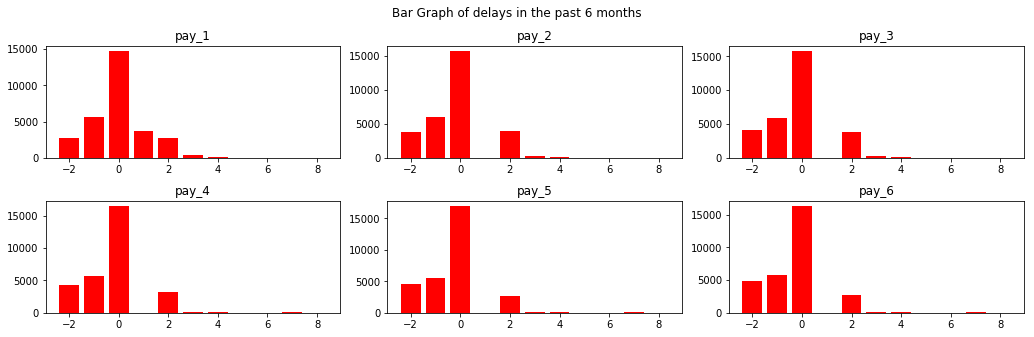

In [4]:
#Column wise payment graph
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Bar Graph of delays in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='r')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

In [5]:
# bill columns
pattern = re.compile("^bill_amt[0-9]+$")
bill_columns = [ x for x in df.columns if (pattern.match(x))]

In [6]:
# pay status columns
pattern = re.compile("^pay_amt[0-9]+$")
pay_amount_columns = [ x for x in df.columns if (pattern.match(x))]

## Data Exploring

defaulting accounts are 22.12% out of 30000 observations


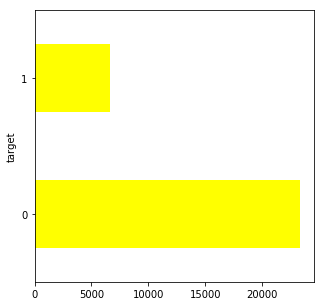

In [7]:
# Gender Ratio
fig = plt.figure()
fig.set_size_inches(5,5)
d = df.groupby(['target']).size()
print("defaulting accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='barh', color='yellow')
plt.show()

In [8]:
df['sex'] = df['sex'].astype('category').cat.rename_categories(['M', 'F'])
df['marriage'] = df['marriage'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])

df['age_cat'] = pd.cut(df['age'], range(0, 100, 10), right=False)

In [9]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]
for i in pay_status_columns:
    df[i] = df[i].astype('category')

## Feature Engineering

In [10]:
# help func
def selcols(prefix, a=1, b=6):
    return [prefix+str(i) for i in np.arange(a,b+1)]

Adding additional features to assess the problem well

In [11]:
from math import log

# average and standard deviation payment status
df['pay_avg'] = df[selcols('pay_')].mean(axis=1)
df['pay_std'] = df[selcols('pay_')].std(axis=1)

In [12]:
# average payment
df['pay_amt_avg']     = df[selcols('pay_amt')].mean(axis=1)

# log of average
df['pay_amt_avg_log'] = df['pay_amt_avg'].apply(lambda x: log(x+1))

#amounts relative to the average payment
for i in np.arange(1,7):
    df['pay_relamt'+str(i)] = df['pay_amt'+str(i)]/df['pay_amt_avg']

# log of payments
for i in np.arange(1,7):
    df['pay_amt_log'+str(i)] = df['pay_amt'+str(i)].apply(lambda x: log(x+1))

In [13]:
# average bill
df['bill_amt_avg'] = df[selcols('bill_amt')].mean(axis=1)
df['bill_amt_avg_log'] = df['bill_amt_avg'].apply(lambda x: log(x+1) if x>0 else 0)

# bill sign as a separate feature
for i in np.arange(1,7):
    df['bill_amt_sign'+str(i)] = df['bill_amt'+str(i)].apply(lambda x: float(x>0))
    
# bill log as a separate feature (0 if bill is negative)
for i in np.arange(1,7):
    df['bill_amt_log'+str(i)] = df['bill_amt'+str(i)].apply(lambda x: log(x+1) if x>0 else 0)
    
#bill amounts relative to the limit
for i in np.arange(1,7):
    df['bill_relamt'+str(i)] = df['bill_amt'+str(i)]/df['limit_bal']

In [14]:
#log of credit limit
df['limit_bal_log'] = df['limit_bal'].apply(lambda x: log(x+1))
df['limit_bal_cat'] = pd.cut(df['limit_bal'], range(0, int(1e6), 10000), right=False)
df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_log5,bill_amt_log6,bill_relamt1,bill_relamt2,bill_relamt3,bill_relamt4,bill_relamt5,bill_relamt6,limit_bal_log,limit_bal_cat
0,20000,F,2,married,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,9.903538,"[20000, 30000)"
1,120000,F,2,single,26,-1,2,0,0,0,...,8.147867,8.090096,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,11.695255,"[120000, 130000)"
2,90000,F,2,single,34,0,0,0,0,0,...,9.612400,9.651816,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,11.407576,"[90000, 100000)"
3,50000,F,2,married,37,0,0,0,0,0,...,10.273671,10.293771,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,10.819798,"[50000, 60000)"
4,50000,M,2,married,57,-1,0,-1,0,0,...,9.859901,9.859118,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,10.819798,"[50000, 60000)"


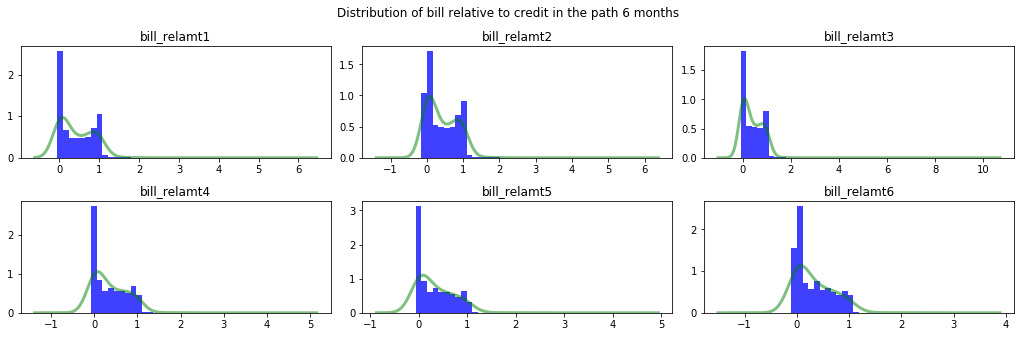

In [15]:
from sklearn.neighbors.kde import KernelDensity

pattern = re.compile("^bill_relamt[0-9]+$")
columns = [ x for x in df.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of bill relative to credit in the path 6 months')

for i in range(len(columns)):
    row,col = int(i/3), i%3

    d = df[columns[i]]
    # the histogram of the data
    n, bins, patches = ax[row,col].hist(d, 50, normed=1, facecolor='blue', alpha=0.75)

    # kernel density estimation
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(d.values.reshape(-1, 1))
    x_grid = np.linspace(d.min(), d.max(), 1000)
    log_pdf = kde.score_samples(x_grid.reshape(-1, 1))

    # add the density line
    ax[row,col].plot(x_grid, np.exp(log_pdf), color='green', alpha=0.5, lw=3)
    ax[row,col].set_title(columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

Defining ROC curve and confusion matrix functions

In [17]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

In [18]:
#Building X and Y
from patsy import dmatrices

formula  = 'target ~ '

# original features
formula += 'C(sex) + C(marriage) +  C(education) + age'
formula += '+' + '+'.join(selcols('pay_'))

#### engineered / normalized features

# categorical age and credit limit (binned)
formula += '+' + 'C(age_cat)'
formula += '+' + 'C(limit_bal_cat) + limit_bal_log'

#pay delays
formula += '+' + 'pay_avg + pay_std'
    
#pay_amt
formula += '+' + 'pay_amt_avg_log'
formula += '+' + '+'.join(selcols('pay_relamt'))
formula += '+' + '+'.join(selcols('pay_amt_log'))

# bill amounts
formula += '+' + 'bill_amt_avg_log'
formula += '+' + '+'.join(selcols('bill_relamt'))
formula += '+' + '+'.join(selcols('bill_amt_sign'))
formula += '+' + '+'.join(selcols('bill_amt_log'))

y, X = dmatrices(formula, data=df, return_type='dataframe')
#y = y.iloc[:, 1]
y.head()

,target
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


Feature Scaling

In [19]:
import warnings
from sklearn.feature_selection import SelectKBest, f_classif

warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))

selector = SelectKBest(f_classif, 25)
selector.fit(X, y)

SelectKBest(k=25, score_func=<function f_classif at 0x0000024E6BCB9488>)

In [20]:
top_indices = np.nan_to_num(selector.scores_).argsort()[-25:][::-1]
selector.scores_[top_indices]
X.columns[top_indices]

Index(['pay_1[T.2]', 'pay_2[T.2]', 'pay_avg', 'pay_3[T.2]', 'pay_4[T.2]',
       'pay_5[T.2]', 'pay_std', 'pay_6[T.2]', 'pay_1[T.0]', 'limit_bal_log',
       'pay_amt_log1', 'pay_amt_avg_log', 'bill_relamt6', 'pay_2[T.0]',
       'bill_relamt5', 'bill_relamt4', 'pay_amt_log2', 'bill_relamt3',
       'bill_relamt2', 'pay_amt_log3', 'pay_1[T.3]', 'bill_relamt1',
       'pay_2[T.3]', 'pay_3[T.0]', 'pay_amt_log4'],
      dtype='object')

In [21]:
#Scaling the DF
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
from sklearn.pipeline import Pipeline

preprocess = Pipeline([('anova', selector), ('scale', scaler)])
preprocess.fit(X,y)

X_prep = preprocess.transform(X)

Model selection and validation

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

Models

In [24]:
#Logistic Regression

from sklearn import linear_model

# Create logistic regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
print("Test accuracy is %2f%%" % (accuracy_score(y_test_pred, y_test)*100))
print("Train accuracy is %2f%%" %(accuracy_score(y_train_pred, y_train)*100))

Test accuracy is 82.849142%
Train accuracy is 82.523082%


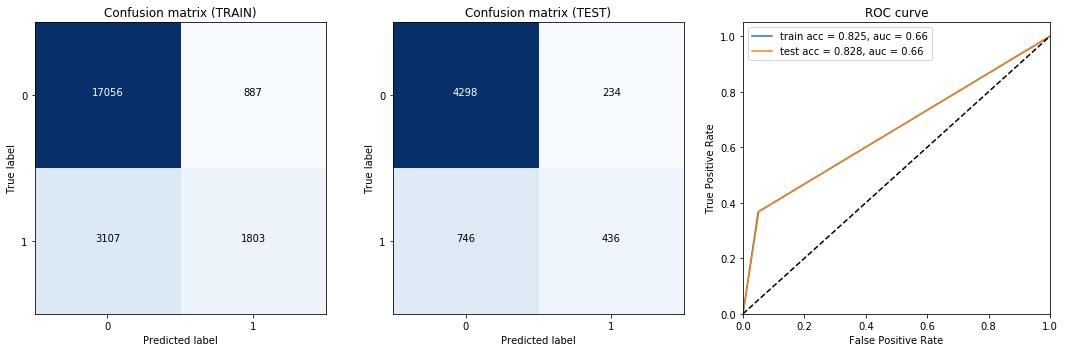

In [26]:
threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [27]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
y_train_pred_RF = regr.predict(X_train)
y_test_pred_RF = regr.predict(X_test)
print("Test accuracy is %2f%%" % (accuracy_score(y_test_pred_RF, y_test)*100))
print("Train accuracy is %2f%%" %(accuracy_score(y_train_pred_RF, y_train)*100))

Test accuracy is 82.849142%
Train accuracy is 82.523082%


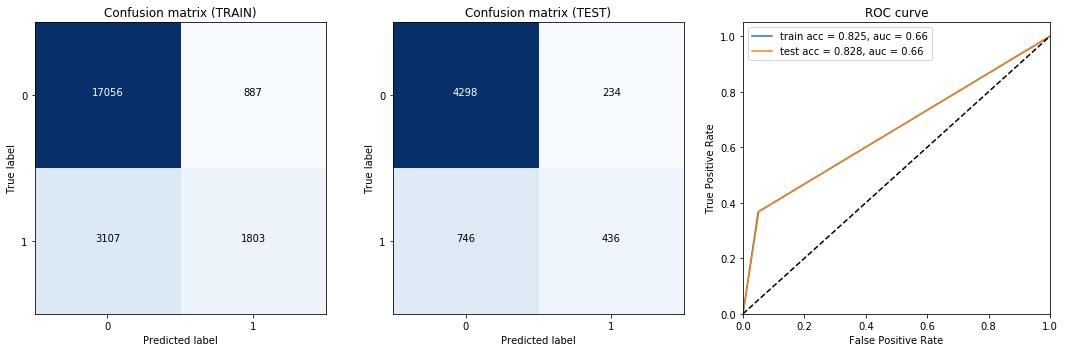

In [29]:
threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred_RF, y_test, y_test_pred_RF, threshold)
    
plt.tight_layout()
plt.show()

In [30]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth=5, n_estimators=500)
gb.fit(X_train,y_train )

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [31]:
y_train_pred_GB = regr.predict(X_train)
y_test_pred_GB = regr.predict(X_test)

print("Test accuracy is %2f%%" % (accuracy_score(y_test_pred_GB, y_test)*100))
print("Train accuracy is %2f%%" %(accuracy_score(y_train_pred_GB, y_train)*100))

Test accuracy is 82.849142%
Train accuracy is 82.523082%


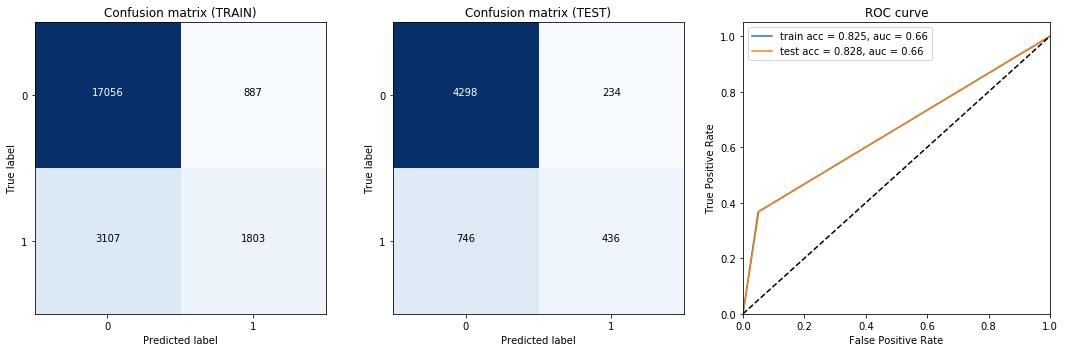

In [32]:
threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred_GB, y_test, y_test_pred_GB, threshold)
    
plt.tight_layout()
plt.show()

## Implementation using Tensor Flow

In [33]:
import tensorflow as tf

learning_rate = 0.1
training_epochs = 10

n_hidden_1 = 10
#n_hidden_2 = 70
#n_hidden_3 = 256

n_input = X_train.shape[1]  #n_input is 25
n_classes = y_train.shape[1] #n_classes is 1

print (n_input)
print(n_classes)

25
1


Building DNN with one hidden layer with 10 neurons

In [34]:
tf.reset_default_graph()

# Inputs
X = tf.placeholder("float", shape=[None, n_input])
y = tf.placeholder("float", shape=[None, n_classes])

# Dictionary of Weights and Biases
weights = {
  'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
#  'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
 # 'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
  'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}

biases = {
  'b1': tf.Variable(tf.random_normal([n_hidden_1])),
 # 'b2': tf.Variable(tf.random_normal([n_hidden_2])),
 # 'b3': tf.Variable(tf.random_normal([n_hidden_3])),
  'out': tf.Variable(tf.random_normal([n_classes]))
}

In [35]:
# Model Forward Propagation step
def forward_propagation(x):
    # Hidden layer1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
   # layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
   # layer_2 = tf.nn.relu(layer_2)
    
   # layer_3 = tf.add(tf.matmul(layer_2, weights['h2']), biases['b2'])
   # layer_3 = tf.nn.relu(layer_2)

    # Output fully connected layer
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out'] 
    return out_layer


# Model Outputs
yhat = forward_propagation(X)
ypredict = tf.argmax(yhat, axis=1)



Building a network with ReLU as activation for the hidden layers and softmax for output layer

In [36]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=yhat))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(cost)

In [37]:
init = tf.global_variables_initializer()

In [38]:
from datetime import datetime
startTime = datetime.now()

with tf.Session() as sess:
    sess.run(init)
    
    #Iterating over EPOCHS
    for epoch in range(training_epochs):
        
        #Stochasting Gradient Descent
        for i in range(len(X_train)):
            summary = sess.run(train_op, feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})
        
        train_accuracy = np.mean(np.argmax(y_train.values.reshape(-1,1), axis=1) == sess.run(ypredict, feed_dict={X: X_train, y: y_train.values.reshape(-1,1)}))
        test_accuracy  = np.mean(np.argmax(y_test.values.reshape(-1,1), axis=1) == sess.run(ypredict, feed_dict={X: X_test, y: y_test.values.reshape(-1,1)}))
                
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%" % (epoch + 1, train_accuracy*100,  test_accuracy *100))
        #print("Epoch = %d, train accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy))

    sess.close()
    
print("Time taken:", datetime.now() - startTime)

Epoch = 1, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 2, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 3, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 4, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 5, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 6, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 7, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 8, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 9, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 10, train accuracy = 100.00%, test accuracy = 100.00%
Time taken: 0:01:32.702990
